# APS 1 - Visão de Máquina
### Lucca Lozano Nasser

In [18]:
import sys
import cv2

print("Python executable:", sys.executable)
print("OpenCV version:", cv2.__version__)


Python executable: c:\Users\lucca\AppData\Local\Programs\Python\Python313\python.exe
OpenCV version: 4.11.0


In [19]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Ex. 1

In [20]:
img_1a = cv2.imread('Figuras_APS1/Fig_APS1_1a.bmp', cv2.IMREAD_COLOR)
img_1b = cv2.imread('Figuras_APS1/Fig_APS1_1b.bmp', cv2.IMREAD_COLOR)

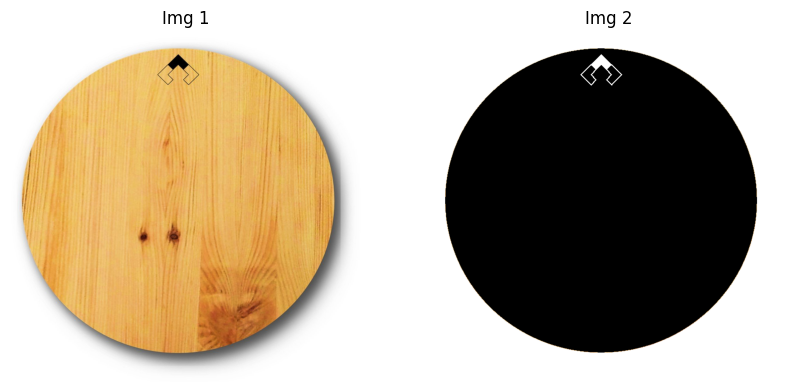

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(cv2.cvtColor(img_1a, cv2.COLOR_BGR2RGB))
ax[0].set_title('Img 1')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(img_1b, cv2.COLOR_BGR2RGB))
ax[1].set_title('Img 2')
ax[1].axis('off')
plt.show()

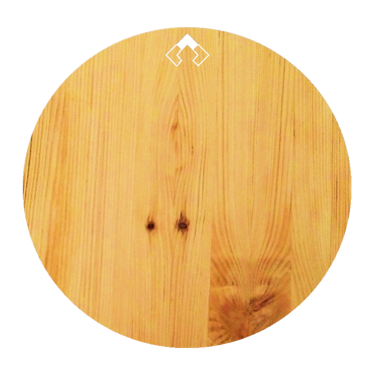

In [22]:
# subtract images
img1_diff = cv2.subtract(img_1a, img_1b)
plt.imshow(img1_diff, cmap='gray')
plt.axis('off')

img1_add = cv2.add(img1_diff, img_1b)
img1_add = cv2.cvtColor(img1_add, cv2.COLOR_BGR2RGB)
plt.imshow(img1_add)
plt.axis('off')
plt.show()

Height:  751
Width =  755


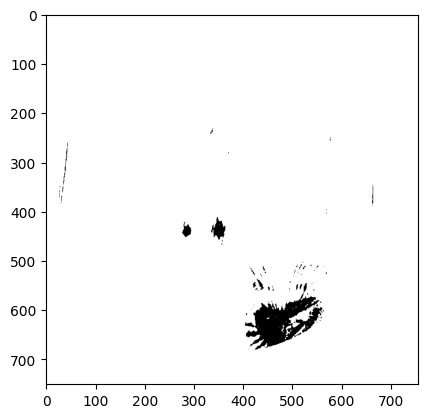

In [23]:
img1_gray = cv2.cvtColor(img1_add, cv2.COLOR_BGR2GRAY)

(h, w) = img1_gray.shape

print('Height: ', h)
print('Width = ', w)

img1_bnw = np.zeros((h,w), dtype = "uint8")

threshold = 100

for i in range(h):
    for j in range(w):

        if img1_gray[i,j] >= threshold:
            img1_bnw[i,j] = 255

plt.figure("Fig Bin")
plt.imshow(img1_bnw, cmap='gray')
plt.show()

In [24]:
black = 0
total = h * w
for i in range(h):
    for j in range(w):

        if img1_bnw[i,j] == 0:
            black += 1
        

percent = (black / total) * 100

print('Pixels pretos:', black)
print('Total de pixels:', total)
print(f'% de nós/falhas = {percent:.2f}%')

Pixels pretos: 9935
Total de pixels: 567005
% de nós/falhas = 1.75%


## Ex. 2

In [25]:
img2_a = cv2.imread('Figuras_APS1/Fig_APS1_2a.bmp', cv2.IMREAD_COLOR)
img2_b = cv2.imread('Figuras_APS1/Fig_APS1_2b.bmp', cv2.IMREAD_GRAYSCALE)

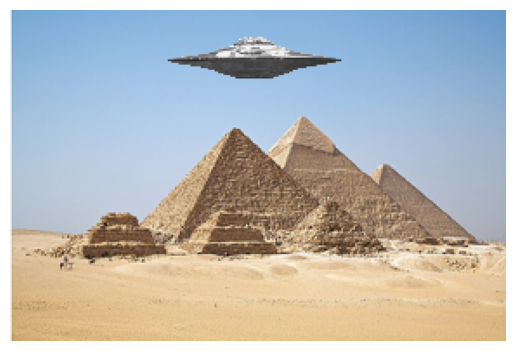

In [26]:
img2_a = cv2.imread('Figuras_APS1/Fig_APS1_2a.bmp', cv2.IMREAD_COLOR)
img2_b = cv2.imread('Figuras_APS1/Fig_APS1_2b.bmp', cv2.IMREAD_GRAYSCALE)

_, mask = cv2.threshold(img2_b, 250, 255, cv2.THRESH_BINARY_INV)

img2_a_rbg = cv2.cvtColor(img2_a, cv2.COLOR_BGR2RGB)
img2_b_rbg = cv2.cvtColor(img2_b, cv2.COLOR_BGR2RGB)

ovni_resize = cv2.resize(img2_b, (img2_a.shape[1], img2_a.shape[0]))
mask = cv2.resize(mask, (img2_a.shape[1], img2_a.shape[0]))

mask_inv = cv2.bitwise_not(mask)

egito_bg = cv2.bitwise_and(img2_a_rbg, img2_a_rbg, mask=mask_inv)
egito_fg = cv2.bitwise_and(img2_b_rbg, img2_b_rbg, mask=mask)

img_final = cv2.add(egito_bg, egito_fg)

plt.imshow(img_final)
plt.axis('off')
plt.show()

## Ex. 3

## Ex. 4

In [27]:
img4_a = cv2.imread('Figuras_APS1/Fig_APS1_4a.bmp', cv2.IMREAD_GRAYSCALE)
img4_b = cv2.imread('Figuras_APS1/Fig_APS1_4b.bmp', cv2.IMREAD_GRAYSCALE)

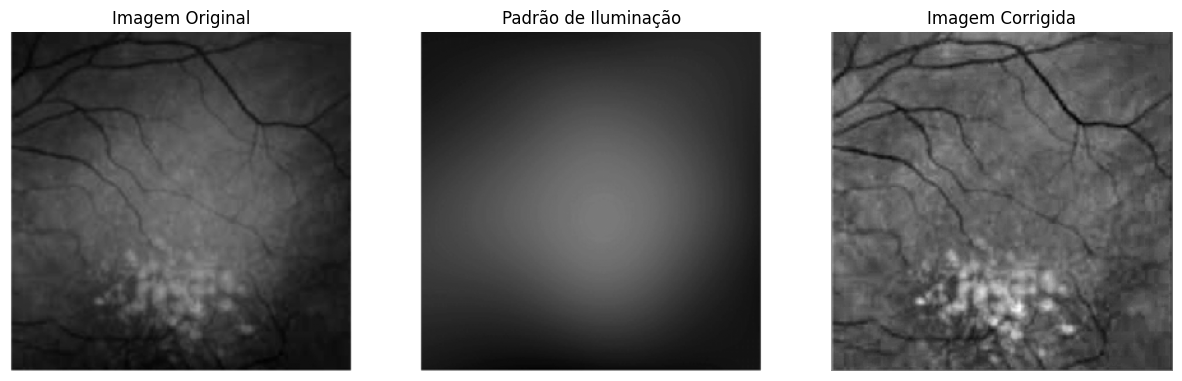

In [28]:
media_intensidade = np.mean(img4_b)

K = media_intensidade / (img4_b + 1e-6)

img_corrigida = np.clip(img4_a * K, 0, 255).astype(np.uint8)

# Use Matplotlib para exibir as imagens
plt.figure(figsize=(15, 5))

# Imagem Original
plt.subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(img4_a, cmap='gray')
plt.axis('off')

# Padrão de Iluminação
plt.subplot(1, 3, 2)
plt.title('Padrão de Iluminação')
plt.imshow(img4_b, cmap='gray')
plt.axis('off')

# Imagem Corrigida
plt.subplot(1, 3, 3)
plt.title('Imagem Corrigida')
plt.imshow(img_corrigida, cmap='gray')
plt.axis('off')

plt.show()
